# Difracción de rayos x

## Geovanny Alexander Rave Franco
## Jaime Fabián Nieto Castellanos

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
pi = np.pi

In [2]:
class Cristal(object):
    """
    a1,a2 y a3 son los vectores de la red. coords es una lista con las coordenadas relativas: [[a,b,c],[e,f,g],...]
    z son los números atómicos de cada elemento de la base atómica.
    """
    def __init__(self,a1,a2,a3,coords,z):
        self._a1 = np.array(a1)
        self._a2 = np.array(a2)
        self._a3 = np.array(a3)
        self._coordrel = np.array(coords) 
        self._lattice = np.array([self._a1,self._a2,self._a3])
        self._coordcart = np.zeros((len(self._coordrel),3))
        self.z = np.array(z)
        
        for i in range(len(self._coordrel)):
            self._coordcart[i] = self._a1*self._coordrel[i][0] + self._a2*self._coordrel[i][1] \
            +  self._a3*self._coordrel[i][2]
                     
    @property
    def red(self):
        return self._lattice
    #Para calcular la red decíproca se debe de dar la red directa como una matriz en donde cada
    #columna es un vector a_i, después se invierte la matriz y se obtiene cada vector b_i en renglones
    @property
    def coords_rel(self):
        return self._coordrel
    @property
    def coords_cart(self):
        return self._coordcart
    
    def rec(self):
        b= 2*np.pi*np.linalg.inv( (self._lattice).T)
        return b    
    
    def sg(self,indices):
        sg=0 #Calcula el factor de estructura
        for i in range(0,len(self._coordrel)):
            sg+= self.z[i]*np.exp(1j*2*pi*(indices[0]*self._coordrel[i][0] + indices[1]*self._coordrel[i][1] \
            + indices[2]*self._coordrel[i][2]))
        return sg
    
    def modulus(self,vector): #para obtener el módulo de un vector en tres dimensiones
        return np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
    
    def theta(self,indices,l): #regresa el ángulo en grados
        G= indices[0]*self.rec()[0] + indices[1]*self.rec()[1] + indices[2]*self.rec()[2] #Vector Ghkl
        A = 0
        if (self.modulus(G)*l/(4*pi)) <=1: #Los planos que no satisfacen esta condición no difractan
            A = np.rad2deg(np.arcsin((self.modulus(G)*l/(4*pi))))
        return A
    
    def espectro(self,l):
        arreglo=[]
        for i in range(0,7):
            for j in range(7):
                for k in range(7):
                    #los for's son para tomar las distintas combinaciones de triadas de 0 a 6
                    a = self.theta([i,j,k],l)
                    if a != 0: 
                        arreglo.append(np.array([2*a,\
                        abs(self.sg([i,j,k]))**2*(1+np.cos(2*np.deg2rad(a))**2)/(np.sin(np.deg2rad(a))**2*np.cos(np.deg2rad(a))),\
                        [i,j,k]])) 
                        #regresa un arreglo on 2 veces el ángulo, la intensidad y los índices de miller
        return arreglo

In [3]:
ao = 5.65325 #Angtroms
#ZGa = 31,  ZAs =  33
#Usamos los vectores de la celda convencional, sobre la cual la base atómica tiene ocho átomos. 
GaAs = Cristal([ao,0,0],[0,ao,0],[0,0,ao],[[0,0,0],[0.5,0.5,0],[0,0.5,0.5],[0.5,0,0.5],[0.25,0.25,0.25]\
,[0.75,0.75,0.25],[0.25,0.75,0.75],[0.75,0.25,0.75]],[31,31,31,31,33,33,33,33])
L = 1.54 #Difracción con cobre L = 1.54 armstrongs
Esp = Esp = GaAs.espectro(L)
Esp

[array([15.656591184779138, 6.850318299566364e-27, list([0, 0, 1])],
       dtype=object),
 array([31.61541410729489, 1546.3830304846147, list([0, 0, 2])],
       dtype=object),
 array([48.23566078958645, 1.3222470345803792e-26, list([0, 0, 3])],
       dtype=object),
 array([66.02463924901538, 306770.0932892902, list([0, 0, 4])],
       dtype=object),
 array([85.84745753273994, 7.595821055059697e-26, list([0, 0, 5])],
       dtype=object),
 array([109.61672615362764, 185.019226646228, list([0, 0, 6])],
       dtype=object),
 array([15.656591184779138, 1.2144289623157178e-26, list([0, 1, 0])],
       dtype=object),
 array([22.211766776614418, 1.2696662022732294e-58, list([0, 1, 1])],
       dtype=object),
 array([35.46378301900096, 2.180451240400948e-27, list([0, 1, 2])],
       dtype=object),
 array([51.02620827992113, 8.299556412313043e-59, list([0, 1, 3])],
       dtype=object),
 array([68.33123192477491, 6.861180472199365e-26, list([0, 1, 4])],
       dtype=object),
 array([87.9765

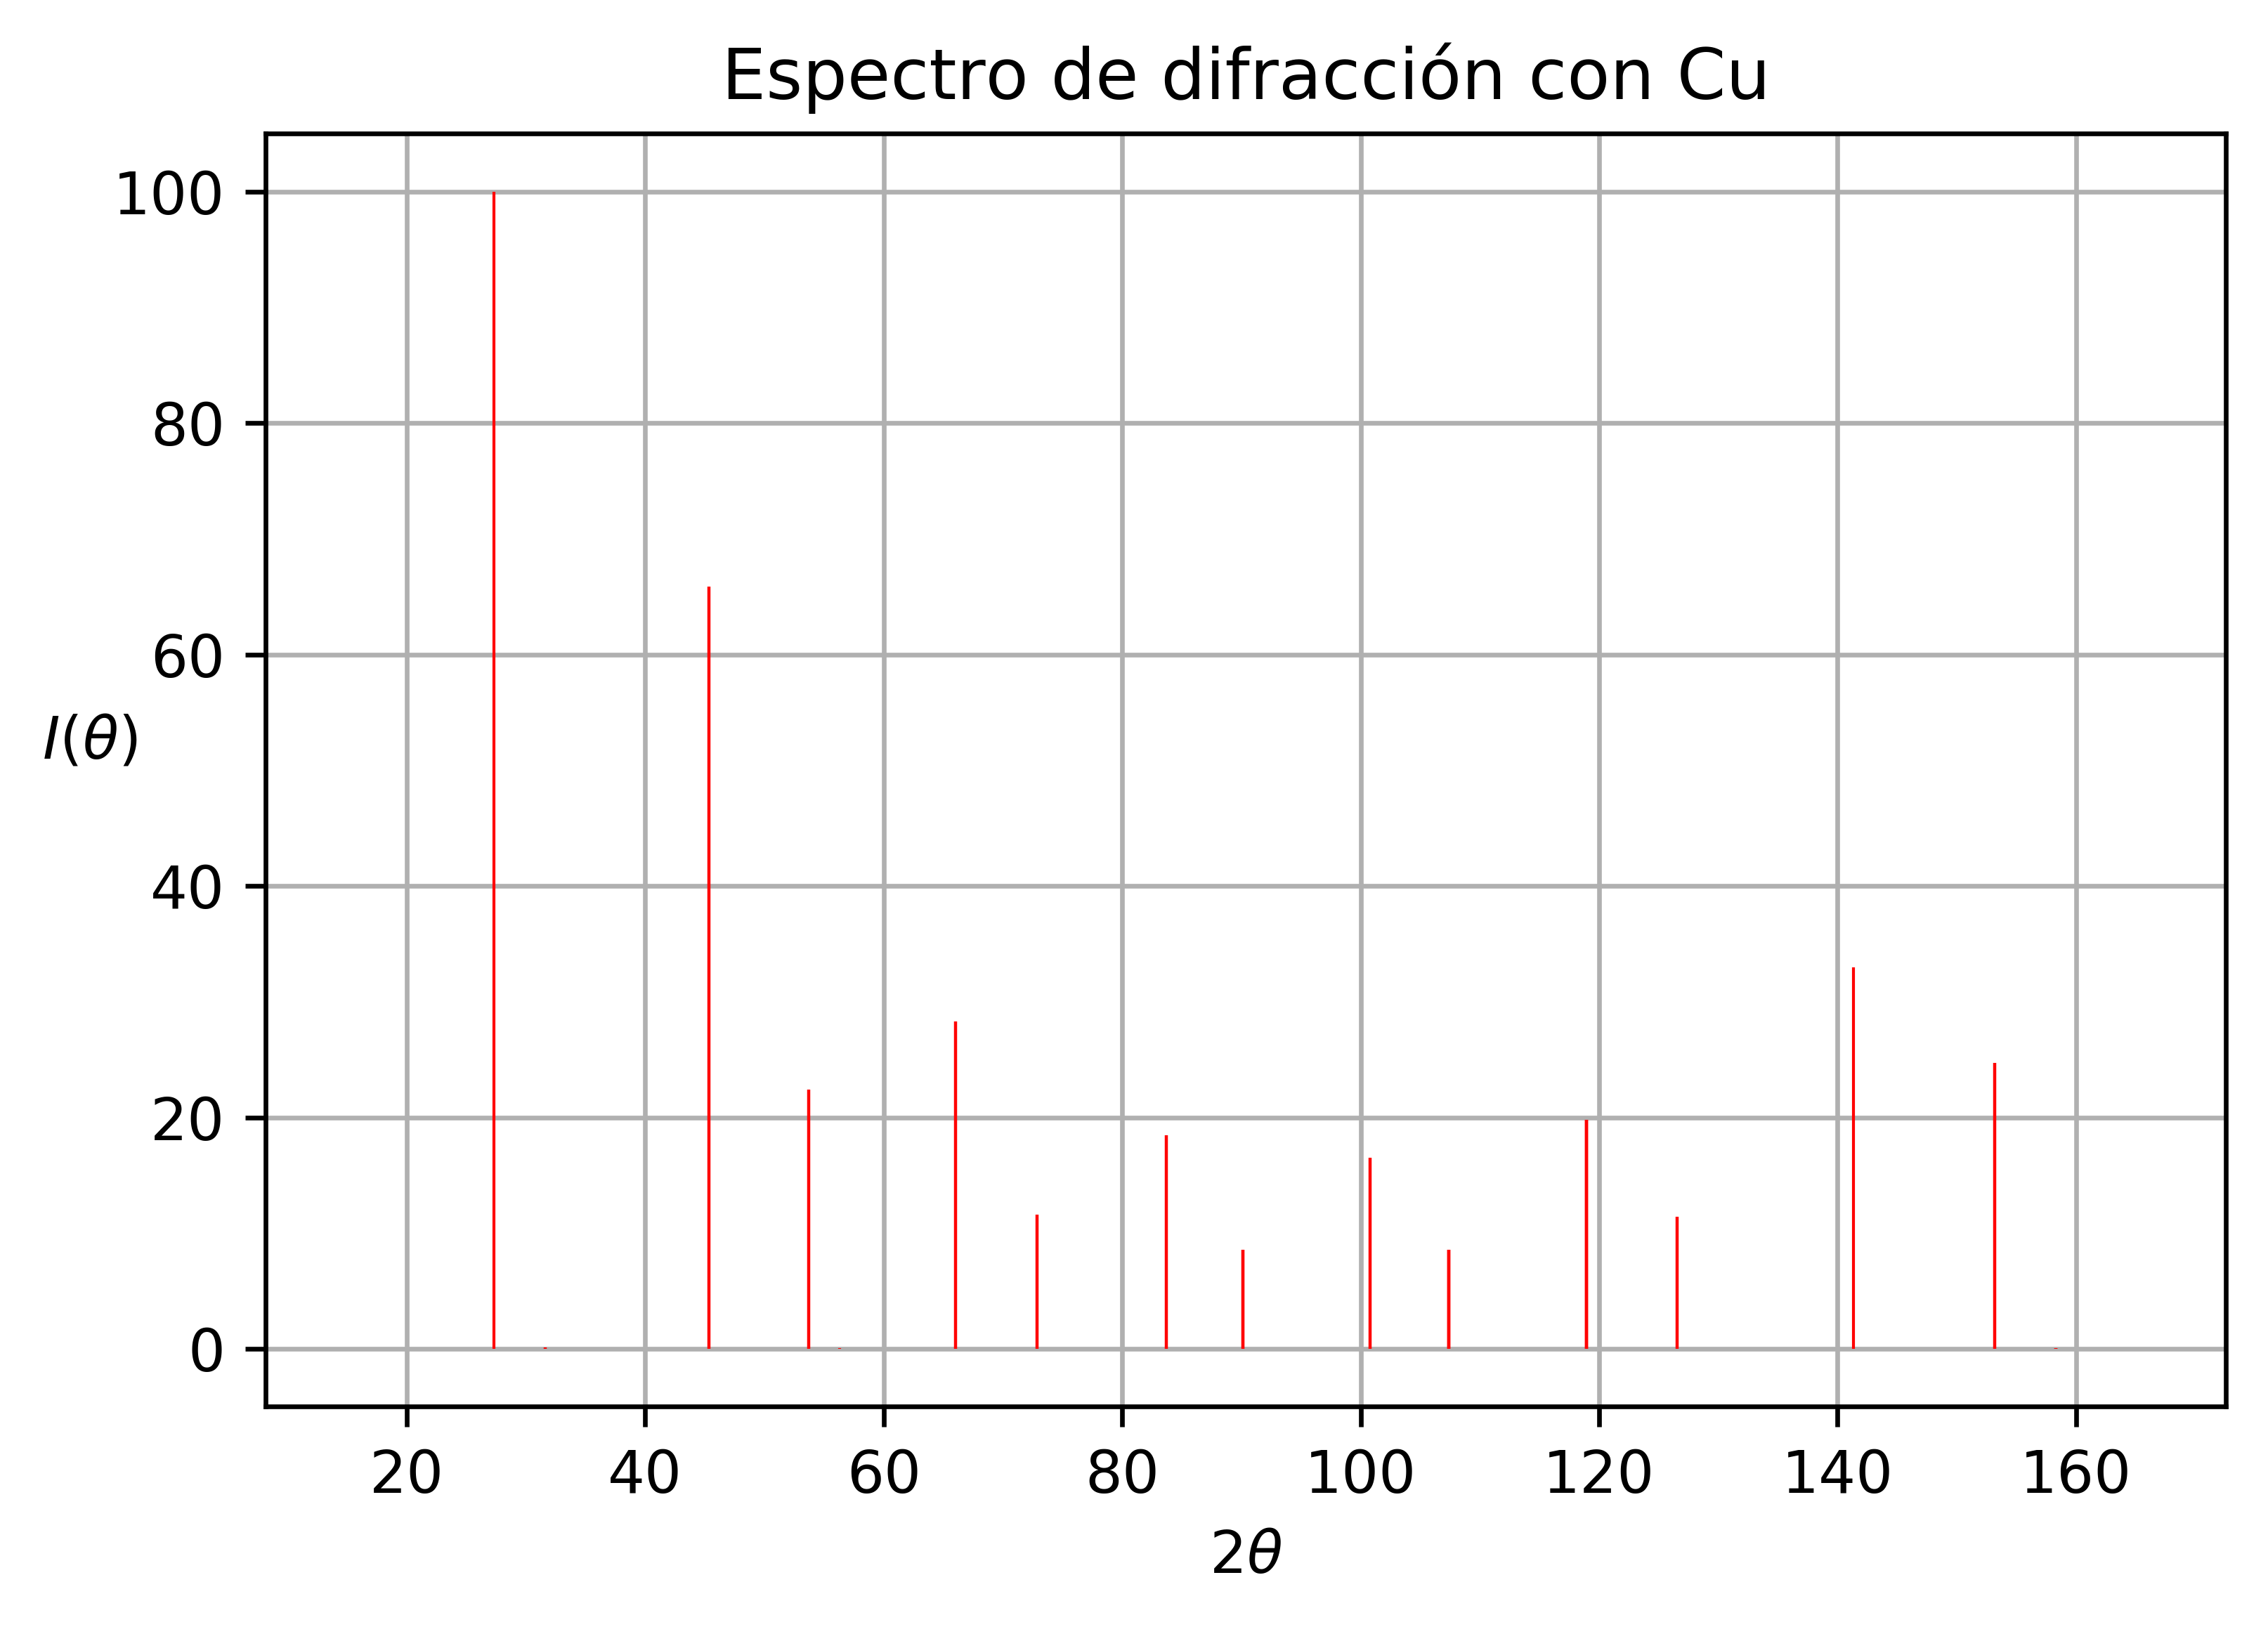

In [4]:
y = []
x = []
for i in range(len(Esp)):
    x.append(Esp[i][0])
    y.append(Esp[i][1])
x = np.array(x)
y = np.array(y)
maxy = max(y)
y = y*100/maxy
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111)
for i in range(0,len(x)): #grafica el espectro de difracción
    plt.vlines(x[i], 0, y[i], colors='r', linestyles='solid',linewidth=0.5)
plt.xlabel(r"$2\theta$")
plt.ylabel(r'$I(\theta)$',rotation=0)
plt.title('Espectro de difracción con Cu')
plt.grid()
plt.show()
#fig.savefig('XRayCu.png')